# Data Preprocessing Tools

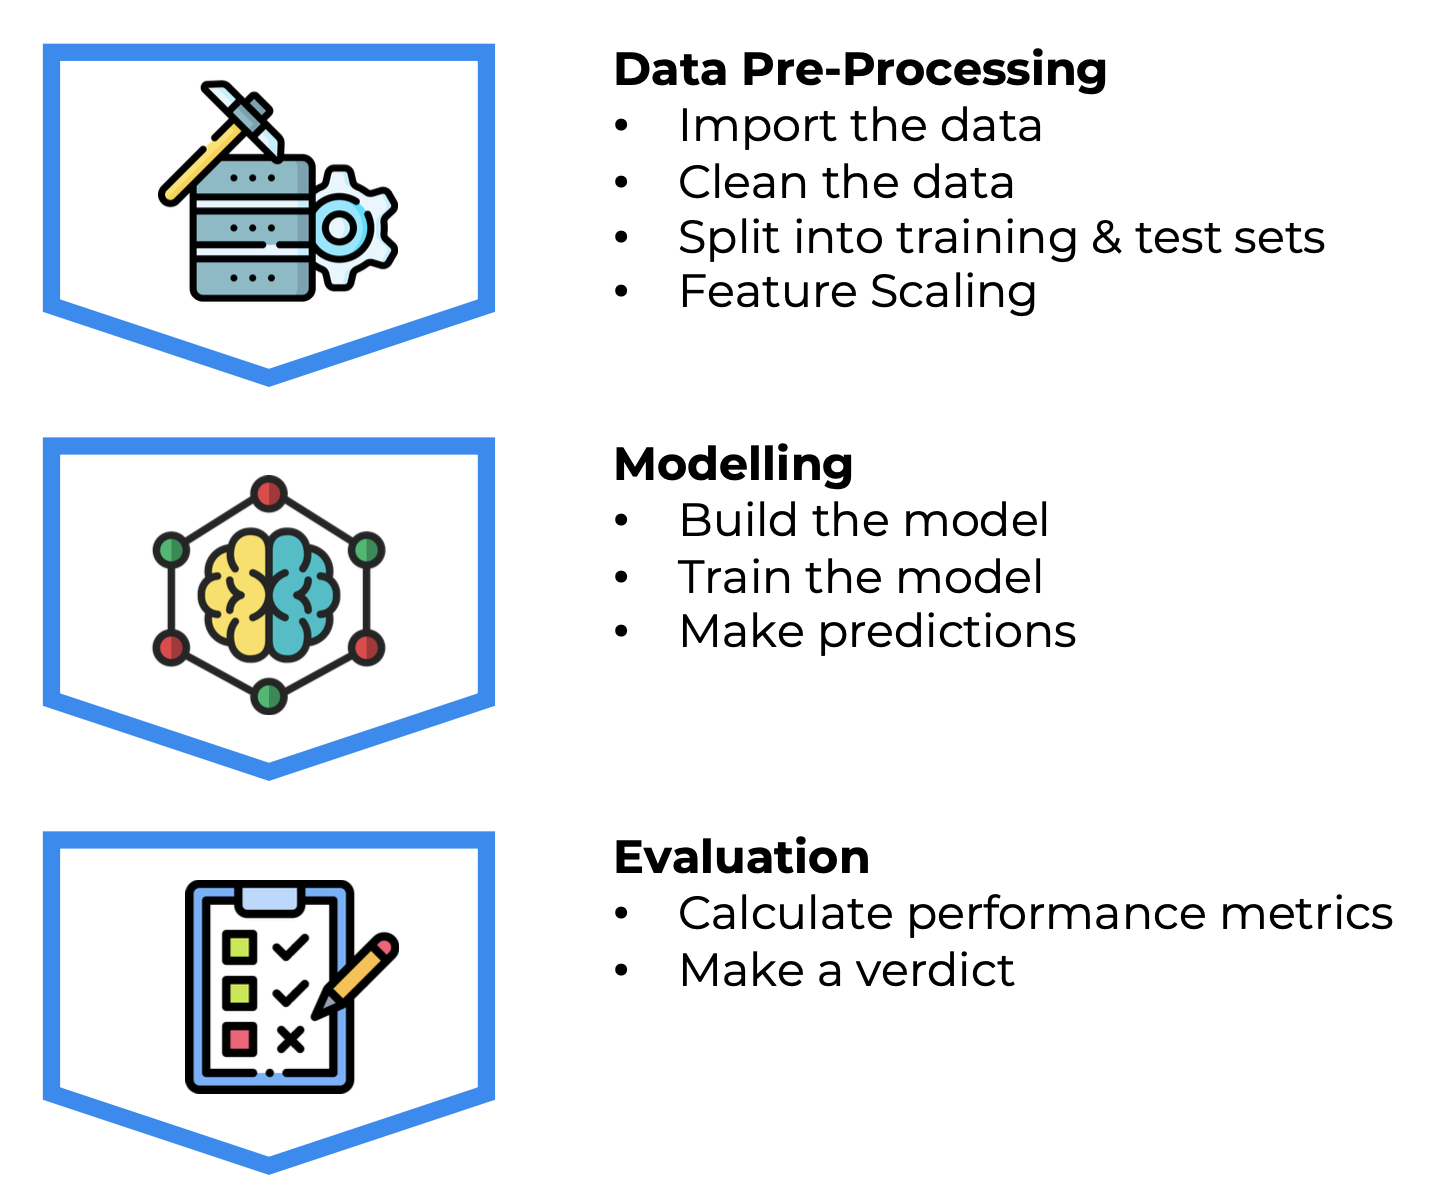

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("../data/purchase-info.csv")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking care of missing data

In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X[:, 1:] = imputer.fit_transform(X[:, 1:])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encoding categorical data

### Encoding the Independent Variable

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encoding the Dependent Variable

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [8]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [9]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [10]:
y_test

array([0, 1])

## Feature Scaling

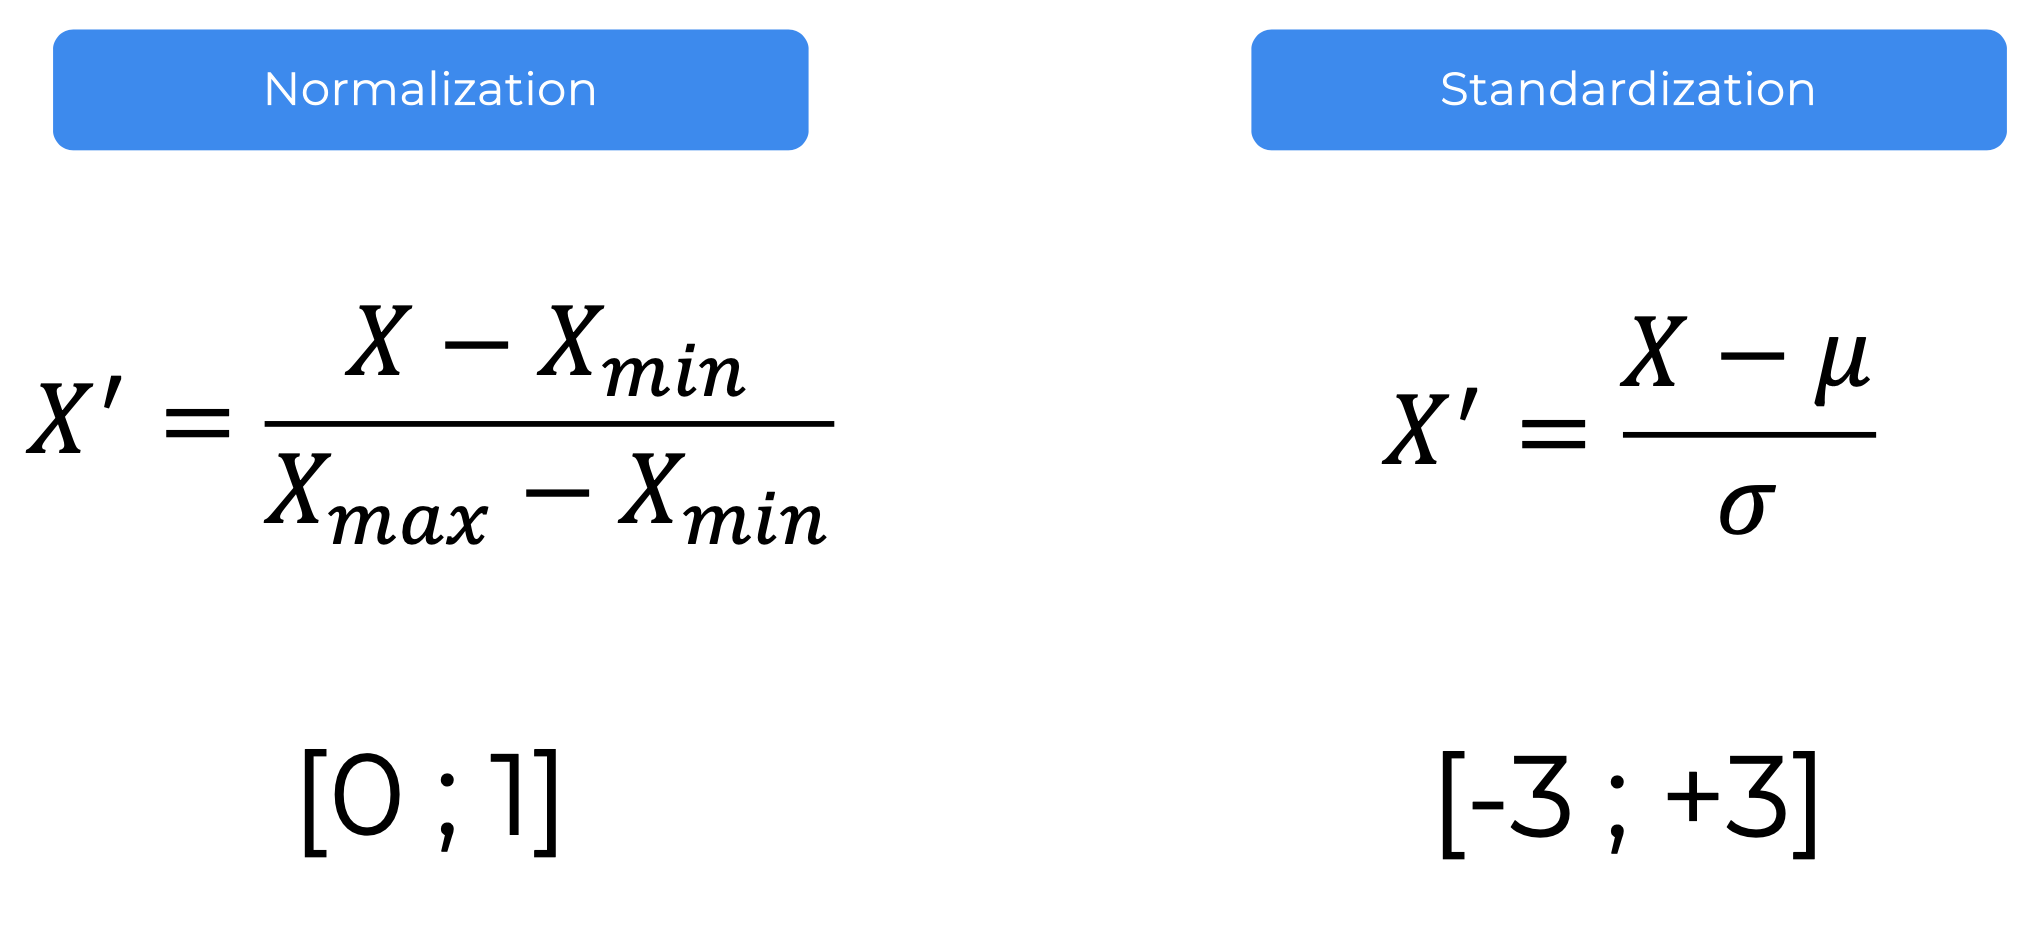

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [12]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [13]:
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)